# The Fundamentals of Autograd
https://docs.pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html 

PyTorch’s Autograd feature is part of what make PyTorch flexible and fast for building machine learning projects. It allows for the rapid and easy computation of multiple partial derivatives (also referred to as gradients) over a complex computation. This operation is central to backpropagation-based neural network learning.

The power of autograd comes from the fact that it traces your computation dynamically at runtime, meaning that if your model has decision branches, or loops whose lengths are not known until runtime, the computation will still be traced correctly, and you’ll get correct gradients to drive learning. This, combined with the fact that your models are built in Python, offers far more flexibility than frameworks that rely on static analysis of a more rigidly-structured model for computing gradients.

In [1]:
# What Do We Need Autograd For?

# A Simple Example

In [2]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [3]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


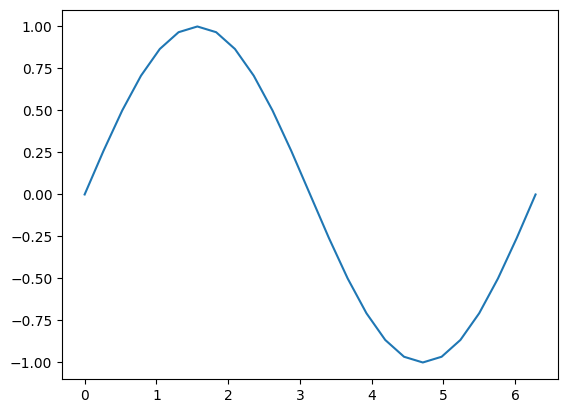

In [4]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [5]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


This grad_fn gives us a hint that when we execute the backpropagation step and compute gradients, we’ll need to compute the derivative of 
sin(x) for all this tensor’s inputs.

In [6]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


Finally, let’s compute a single-element output. When you call .backward() on a tensor with no arguments, it expects the calling tensor to contain only a single element, as is the case when computing a loss function.

In [7]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


Each grad_fn stored with our tensors allows you to walk the computation all the way back to its inputs with its next_functions property

In [8]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x0000024F7D044280>, 0), (None, 0))
((<SinBackward0 object at 0x0000024F7D044280>, 0), (None, 0))
((<AccumulateGrad object at 0x0000024F24AA6920>, 0),)
()

c:

b:

a:
None


With all this machinery in place, how do we get derivatives out? 
You call the backward() method on the output, and check the input’s grad property to inspect the gradients:

a.grad=
tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


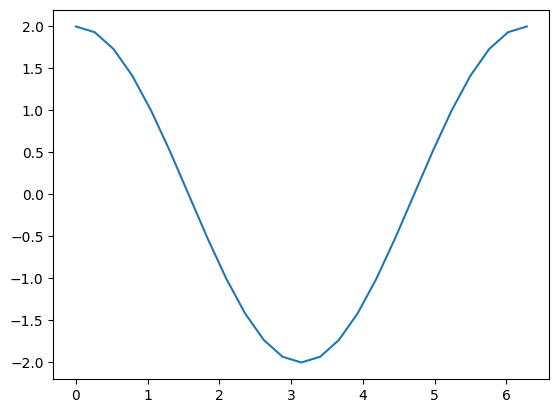

In [9]:
out.backward()
print("a.grad:")
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

Be aware that only leaf nodes of the computation have their gradients computed. If you tried, for example, print(c.grad) you’d get back None. In this simple example, only the input is a leaf node, so only it has gradients computed.

# Autograd in Training
We’ve had a brief look at how autograd works, but how does it look when it’s used for its intended purpose? Let’s define a small model and examine how it changes after a single training batch. First, define a few constants, our model, and some stand-ins for inputs and outputs:

In [10]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

One thing you might notice is that we never specify requires_grad=True for the model’s layers. Within a subclass of torch.nn.Module, it’s assumed that we want to track gradients on the layers’ weights for learning.

If we look at the layers of the model, we can examine the values of the weights, and verify that no gradients have been computed yet:

In [11]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

tensor([ 0.0051, -0.0207, -0.0864, -0.0240,  0.0269,  0.0415,  0.0175, -0.0544,
        -0.0995, -0.0462], grad_fn=<SliceBackward0>)
None


Let’s see how this changes when we run through one training batch. For a loss function, we’ll just use the square of the Euclidean distance between our prediction and the ideal_output, and we’ll use a basic stochastic gradient descent optimizer.

In [12]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(177.0067, grad_fn=<SumBackward0>)


Now, let’s call loss.backward() and see what happens:

In [13]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0051, -0.0207, -0.0864, -0.0240,  0.0269,  0.0415,  0.0175, -0.0544,
        -0.0995, -0.0462], grad_fn=<SliceBackward0>)
tensor([ 0.0458,  0.2373,  0.8954, -1.9541, -5.5126, -2.0536, -3.7394,  0.4014,
         1.0733, -2.4823])


We can see that the gradients have been computed for each learning weight, but the weights remain unchanged, because we haven’t run the optimizer yet. The optimizer is responsible for updating model weights based on the computed gradients.

In [14]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0050, -0.0210, -0.0873, -0.0220,  0.0324,  0.0436,  0.0212, -0.0548,
        -0.1006, -0.0437], grad_fn=<SliceBackward0>)
tensor([ 0.0458,  0.2373,  0.8954, -1.9541, -5.5126, -2.0536, -3.7394,  0.4014,
         1.0733, -2.4823])


You should see that layer2’s weights have changed.

One important thing about the process: After calling optimizer.step(), you need to call optimizer.zero_grad(), or else every time you run loss.backward(), the gradients on the learning weights will accumulate:

In [15]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad(set_to_none=False)

print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0458,  0.2373,  0.8954, -1.9541, -5.5126, -2.0536, -3.7394,  0.4014,
         1.0733, -2.4823])
tensor([  2.7703,   3.0599,  10.3478,  -5.7819, -38.5371,  -2.8225, -28.2302,
         19.9031,  17.2700,  -0.4130])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


After running the cell above, you should see that after running loss.backward() multiple times, the magnitudes of most of the gradients will be much larger. Failing to zero the gradients before running your next training batch will cause the gradients to blow up in this manner, causing incorrect and unpredictable learning results.

# Turning Autograd Off and On
here are situations where you will need fine-grained control over whether autograd is enabled. There are multiple ways to do this, depending on the situation.

The simplest is to change the requires_grad flag on a tensor directly:

In [19]:
a = torch.ones(2, 3, requires_grad=True)
print("a = ", a)

b1 = 2 * a
print("b1 = ", b1)

a.requires_grad = False
b2 = 2 * a
print("b2 = ", b2)

a =  tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
b1 =  tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
b2 =  tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [20]:
# If you only need autograd turned off temporarily, a better way is to use the torch.no_grad():

a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print("c1 = ", c1)

with torch.no_grad():
    c2 = a + b

print("c2 = ", c2)

c3 = a * b
print("c3 = ", c3)

c1 =  tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
c2 =  tensor([[5., 5., 5.],
        [5., 5., 5.]])
c3 =  tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


torch.no_grad() can also be used as a function or method decorator:

In [21]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


There’s a corresponding context manager, torch.enable_grad(), for turning autograd on when it isn’t already. It may also be used as a decorator.

Finally, you may have a tensor that requires gradient tracking, but you want a copy that does not. For this we have the Tensor object’s detach() method - it creates a copy of the tensor that is detached from the computation history:

In [22]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.4709, 0.1261, 0.7452, 0.0492, 0.8732], requires_grad=True)
tensor([0.4709, 0.1261, 0.7452, 0.0492, 0.8732])


We did this above when we wanted to graph some of our tensors. This is because matplotlib expects a NumPy array as input, and the implicit conversion from a PyTorch tensor to a NumPy array is not enabled for tensors with requires_grad=True. Making a detached copy lets us move forward.

# Autograd and In-place Operations

In every example in this notebook so far, we’ve used variables to capture the intermediate values of a computation. Autograd needs these intermediate values to perform gradient computations. For this reason, you must be careful about using in-place operations when using autograd. Doing so can destroy information you need to compute derivatives in the backward() call. PyTorch will even stop you if you attempt an in-place operation on leaf variable that requires autograd, as shown below.

In [23]:
# The following code cell throws a runtime error. This is expected.
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
torch.sin_(a)

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

# Autograd Profiler
Autograd tracks every step of your computation in detail. Such a computation history, combined with timing information, would make a handy profiler - and autograd has that feature baked in. Here’s a quick example usage:

In [25]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::mul        50.22%       2.697ms        50.22%       2.697ms       2.697us          1000  
    aten::div        49.78%       2.674ms        49.78%       2.674ms       2.674us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 5.371ms



# Advanced Topic: More Autograd Detail and the High-Level API
``torch.autograd`` is an engine for computing these products. This is how we accumulate the gradients over the learning weights during the backward pass.
For this reason, the backward() call can also take an optional vector input. This vector represents a set of gradients over the tensor, which are multiplied by the Jacobian of the autograd-traced tensor that precedes it. Let’s try a specific example with a small vector:

In [28]:
x = torch.randn(3, requires_grad=True)

y = x * 2
# while y.data.norm() < 1000:
while y.detach().norm() < 1000:   # use .detach() instead (since .data is not recommended anymore).
    y = y * 2

print(y)

tensor([ 602.4924,  533.5477, -618.1384], grad_fn=<MulBackward0>)


# The High-Level API
There is an API on autograd that gives you direct access to important differential matrix and vector operations. In particular, it allows you to calculate the Jacobian and the Hessian matrices of a particular function for particular inputs. (The Hessian is like the Jacobian, but expresses all partial second derivatives.) It also provides methods for taking vector products with these matrices.

Let’s take the Jacobian of a simple function, evaluated for a 2 single-element inputs:


In [29]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.2002]), tensor([0.1266]))


(tensor([[2.4432]]), tensor([[3.]]))